<a href="https://colab.research.google.com/github/bartiralira/bootcampIA/blob/main/BootCamp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!missingno
import missingno as msno
import seaborn as sbs

/bin/bash: missingno: command not found


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Conhecendo o DS

In [78]:
url = 'https://raw.githubusercontent.com/bartiralira/bootcampIA/a0095c50dfa059f29ebb71a6afaf19f7bbdfc95a/solicitacoescredito.csv'
dfo=pd.read_csv(url, engine='python')
dfo.head()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,definicaoRisco,diferencaPercentualRisco,percentualRisco,dashboardCorrelacao,valorAprovado,dataAprovadoEmComite,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,totalPatrimonioLiquido,endividamento,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,50000.0,AprovadoAnalista,De 11 a 30 % - Baixo,0.716981,0.283019,0.000000,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1766880.0,0.0,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.0,43200.0,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,NaN,2019-06-12T17:28:31,0,0.00,10000.0,DocumentacaoReprovada,De 0 a 10 % - Muito Baixo,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,20000.0,AprovadoAnalista,De 11 a 30 % - Baixo,0.716981,0.283019,0.000000,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2814940.0,0.0,7.0,0.0,2014.0,De 6 a 10 anos,20000.0,False,True,1.0,4320.0,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,2017-02-13T17:20:27,0,0.00,25000.0,AprovadoAnalista,De 51 a 80 % - Alto,0.396226,0.603774,0.485811,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1285274.0,0.0,12.0,0.0,2013.0,De 6 a 10 anos,30000.0,False,True,0.0,5920.0,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,50000.0,AprovadoAnalista,De 11 a 30 % - Baixo,0.830189,0.169811,0.000000,50000.0,NaN,2019-09-30T00:00:00,14758917.0,12149031.0,25793410.0,14544378.0,3039112.0,11797928.0,3047791.0,40779757.0,81459809.0,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.0,89000.0,2020-02-04T15:06:28


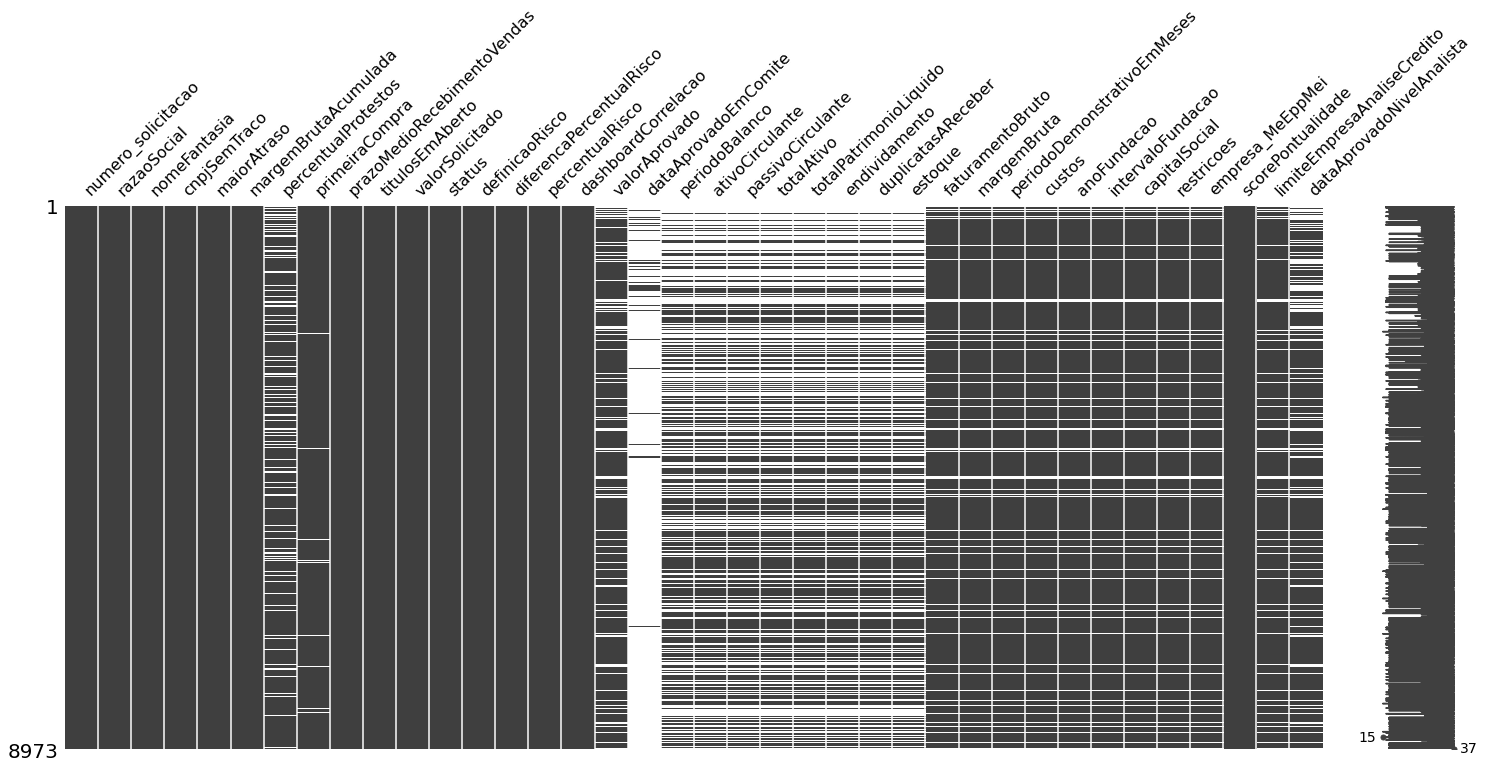

In [79]:
%matplotlib inline
msno.matrix(dfo)

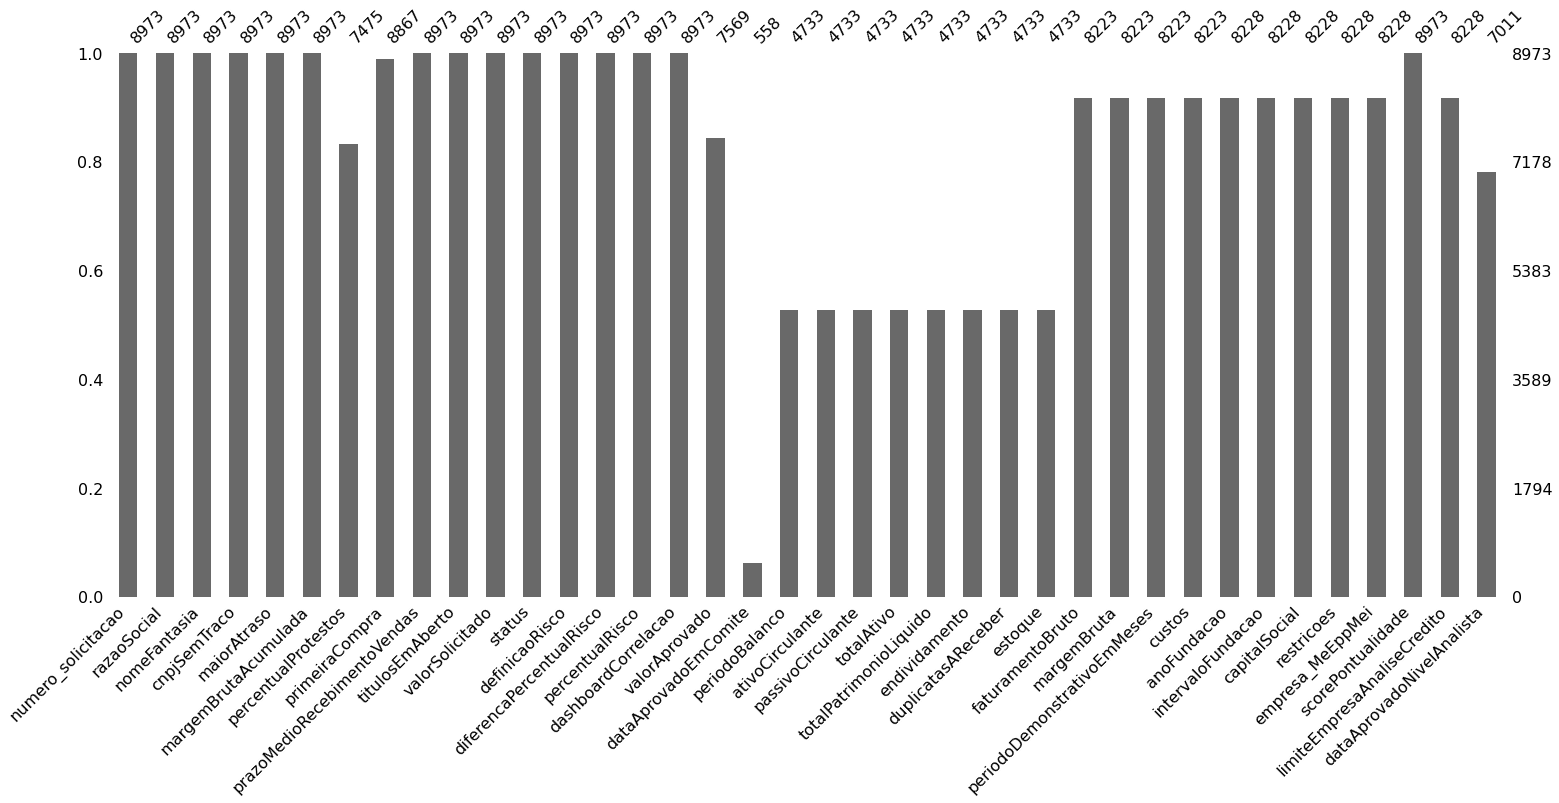

In [80]:
%matplotlib inline
msno.bar(dfo)

AxesSubplot(0.125,0.3515;0.775x0.5285) 



Text(0.5, 1.0, 'Correlation matrix')

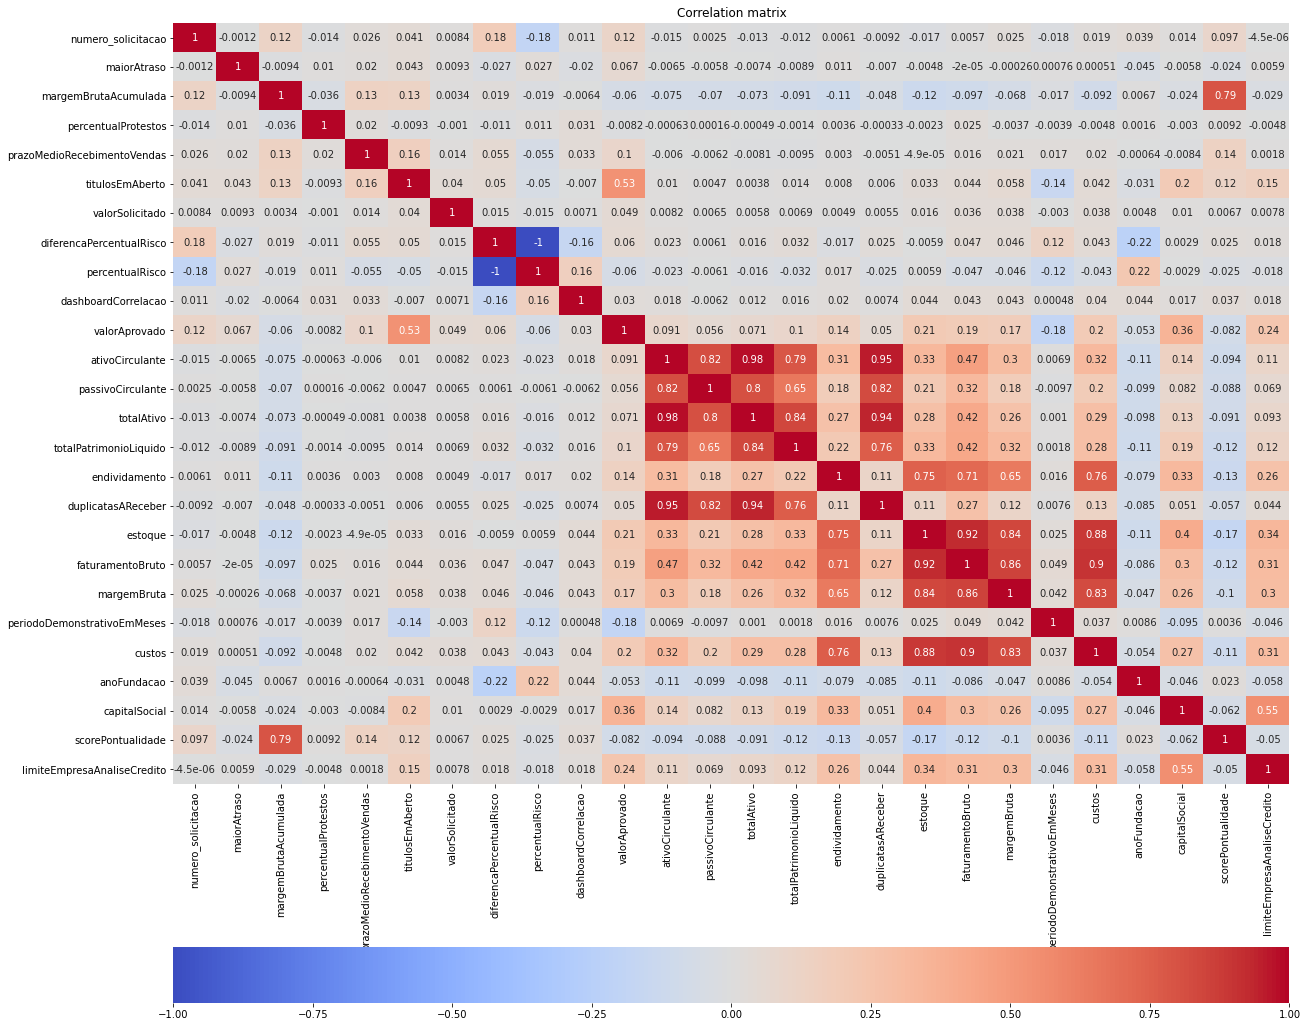

In [81]:
plt.figure(figsize=(20,20)) 
print(sbs.heatmap(dfo.corr(), annot=True, cmap="coolwarm",cbar_kws= {'orientation': 'horizontal'}),"\n")
plt.title('Correlation matrix')

In [82]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   numero_solicitacao           8973 non-null   int64  
 1   razaoSocial                  8973 non-null   object 
 2   nomeFantasia                 8973 non-null   object 
 3   cnpjSemTraco                 8973 non-null   object 
 4   maiorAtraso                  8973 non-null   int64  
 5   margemBrutaAcumulada         8973 non-null   float64
 6   percentualProtestos          7475 non-null   float64
 7   primeiraCompra               8867 non-null   object 
 8   prazoMedioRecebimentoVendas  8973 non-null   int64  
 9   titulosEmAberto              8973 non-null   float64
 10  valorSolicitado              8973 non-null   float64
 11  status                       8973 non-null   object 
 12  definicaoRisco               8973 non-null   object 
 13  diferencaPercentua

In [83]:
#verificando quantos sao os missings
dfo.isnull().sum().sort_values(ascending=True)

numero_solicitacao                0
scorePontualidade                 0
dashboardCorrelacao               0
percentualRisco                   0
definicaoRisco                    0
status                            0
valorSolicitado                   0
titulosEmAberto                   0
diferencaPercentualRisco          0
margemBrutaAcumulada              0
maiorAtraso                       0
cnpjSemTraco                      0
nomeFantasia                      0
razaoSocial                       0
prazoMedioRecebimentoVendas       0
primeiraCompra                  106
anoFundacao                     745
intervaloFundacao               745
capitalSocial                   745
restricoes                      745
limiteEmpresaAnaliseCredito     745
empresa_MeEppMei                745
faturamentoBruto                750
custos                          750
periodoDemonstrativoEmMeses     750
margemBruta                     750
valorAprovado                  1404
percentualProtestos         

In [84]:
#verificando a correlação com os campos de valor aprovado que é a nossa variavel de interesse.
#Vamos focar nessas variaveis
print(round(dfo.corr(method='pearson')["valorAprovado"]*100,2).sort_values(ascending=False),'\n')

valorAprovado                  100.00
titulosEmAberto                 53.13
capitalSocial                   35.53
limiteEmpresaAnaliseCredito     24.08
estoque                         20.53
custos                          19.95
faturamentoBruto                18.83
margemBruta                     17.35
endividamento                   14.17
numero_solicitacao              11.68
totalPatrimonioLiquido          10.15
prazoMedioRecebimentoVendas      9.96
ativoCirculante                  9.08
totalAtivo                       7.07
maiorAtraso                      6.71
diferencaPercentualRisco         6.03
passivoCirculante                5.61
duplicatasAReceber               4.98
valorSolicitado                  4.89
dashboardCorrelacao              3.04
percentualProtestos             -0.82
anoFundacao                     -5.27
margemBrutaAcumulada            -5.98
percentualRisco                 -6.03
scorePontualidade               -8.16
periodoDemonstrativoEmMeses    -18.25
Name: valorA

In [85]:
#entendendo o score de pontualidade que parece ser uma variavle importante para o negocio quando falamos de credito
print(round(dfo.corr(method='pearson')["scorePontualidade"]*100,2).sort_values(ascending=False),'\n')

scorePontualidade              100.00
margemBrutaAcumulada            79.24
prazoMedioRecebimentoVendas     14.00
titulosEmAberto                 12.02
numero_solicitacao               9.68
dashboardCorrelacao              3.67
diferencaPercentualRisco         2.49
anoFundacao                      2.31
percentualProtestos              0.92
valorSolicitado                  0.67
periodoDemonstrativoEmMeses      0.36
maiorAtraso                     -2.44
percentualRisco                 -2.49
limiteEmpresaAnaliseCredito     -4.98
duplicatasAReceber              -5.69
capitalSocial                   -6.22
valorAprovado                   -8.16
passivoCirculante               -8.77
totalAtivo                      -9.10
ativoCirculante                 -9.41
margemBruta                    -10.04
custos                         -11.42
totalPatrimonioLiquido         -11.62
faturamentoBruto               -12.16
endividamento                  -13.12
estoque                        -16.59
Name: scoreP

In [86]:
#Vendo quantas solicitações são zero
dfo.groupby("scorePontualidade",as_index=False).agg({"numero_solicitacao":"count"}).sort_values(by=["numero_solicitacao"],ascending= False)

,scorePontualidade,numero_solicitacao
384,1.000000,5594
0,0.000000,1556
126,0.830644,21
347,0.994786,16
364,0.998127,16
...,...,...
211,0.924353,1
65,0.669327,1
185,0.898922,1
134,0.839977,1


In [87]:
#vendo as correlações com o percentuial de protestos
print(round(dfo.corr(method='pearson')["percentualProtestos"]*100,2).sort_values(ascending=False),'\n')

percentualProtestos            100.00
dashboardCorrelacao              3.14
faturamentoBruto                 2.45
prazoMedioRecebimentoVendas      1.99
percentualRisco                  1.13
maiorAtraso                      1.00
scorePontualidade                0.92
endividamento                    0.36
anoFundacao                      0.16
passivoCirculante                0.02
duplicatasAReceber              -0.03
totalAtivo                      -0.05
ativoCirculante                 -0.06
valorSolicitado                 -0.10
totalPatrimonioLiquido          -0.14
estoque                         -0.23
capitalSocial                   -0.30
margemBruta                     -0.37
periodoDemonstrativoEmMeses     -0.39
limiteEmpresaAnaliseCredito     -0.48
custos                          -0.48
valorAprovado                   -0.82
titulosEmAberto                 -0.93
diferencaPercentualRisco        -1.13
numero_solicitacao              -1.40
margemBrutaAcumulada            -3.64
Name: percen

In [88]:
dfo.groupby("percentualProtestos",as_index=False).agg({"numero_solicitacao":"count"}).sort_values(by=["numero_solicitacao"],ascending= False)

,percentualProtestos,numero_solicitacao
0,0.000000,7452
8,15.298110,5
1,0.495062,3
2,0.590746,3
3,0.955608,3
4,1.702576,3
5,3.035995,3
6,3.387862,1
7,6.769564,1
9,36.983728,1


In [89]:
dfo[["scorePontualidade","percentualProtestos"]].corr()

,scorePontualidade,percentualProtestos
scorePontualidade,1.000000,0.009248
percentualProtestos,0.009248,1.000000


In [90]:
dfo.groupby("status").agg({"cnpjSemTraco":"count"})

,cnpjSemTraco
status,
AguardandoAprovacao,1
AprovadoAnalista,7011
AprovadoComite,558
DocumentacaoReprovada,504
EmAnaliseDocumentacao,289
ReprovadoAnalista,590
ReprovadoComite,20


In [91]:
dfo[(dfo["percentualProtestos"]>15)]

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,definicaoRisco,diferencaPercentualRisco,percentualRisco,dashboardCorrelacao,valorAprovado,dataAprovadoEmComite,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,totalPatrimonioLiquido,endividamento,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
236,245,Gemma Charlton,Lydia Morrison,VSWM57040130755217,21,0.294314,15.298110,2019-08-09T00:00:00,107,0.0,20000.0,ReprovadoAnalista,De 31 a 50 % - Médio,0.641509,0.358491,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229996561.0,0.0,5.0,0.0,1998.0,Acima de 17 anos,100000.0,True,False,1.0,136500.0,NaN
563,581,Gemma Charlton,Lydia Morrison,VSWM57040130755217,21,0.294314,15.298110,2019-08-09T00:00:00,107,0.0,20000.0,AprovadoAnalista,De 31 a 50 % - Médio,0.660377,0.339623,0.866025,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229996561.0,0.0,5.0,0.0,1998.0,Acima de 17 anos,100000.0,True,False,1.0,136500.0,2020-02-21T17:53:15
3722,3795,Gemma Charlton,Lydia Morrison,VSWM57040130755217,21,0.294314,15.298110,2019-08-09T00:00:00,107,0.0,20000.0,DocumentacaoReprovada,De 0 a 10 % - Muito Baixo,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3723,3796,Gemma Charlton,Lydia Morrison,VSWM57040130755217,21,0.294314,15.298110,2019-08-09T00:00:00,107,0.0,20000.0,DocumentacaoReprovada,De 0 a 10 % - Muito Baixo,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4226,4299,Gemma Charlton,Lydia Morrison,VSWM57040130755217,21,0.294314,15.298110,2019-08-09T00:00:00,107,0.0,20000.0,AprovadoAnalista,De 11 a 30 % - Baixo,0.732143,0.267857,0.866025,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,925011533.0,0.0,12.0,0.0,1998.0,Acima de 17 anos,100000.0,False,False,1.0,20400.0,2020-08-20T21:32:31
4684,4757,Ms. Linda Perry,Allan Morgan,TNLX82743930065734,63,0.172341,36.983728,2018-11-29T00:00:00,0,0.0,45000.0,AprovadoAnalista,De 31 a 50 % - Médio,0.535714,0.464286,0.866025,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6908692.0,0.0,12.0,0.0,2017.0,De 0 a 5 anos,200000.0,False,True,1.0,2160.0,2020-09-09T18:30:33


* correlacao entre endividamento e estoque

In [92]:
dfo[["endividamento","estoque"]].corr()

,endividamento,estoque
endividamento,1.00000,0.74646
estoque,0.74646,1.00000


## **Resolvendo os missing**

* *Valor aprovado*

*se o valor aprovado for zero ou nulo consideramos zero*

In [93]:
dfo["valorAprovadoTratado"]=np.where((dfo["valorAprovado"]<0) | (dfo["valorAprovado"].isnull()), 0,dfo["valorAprovado"])

In [94]:
dfo["valorAprovadoTratado"].isnull().sum()

0

* *Data aprovado nivel analista e comitê*


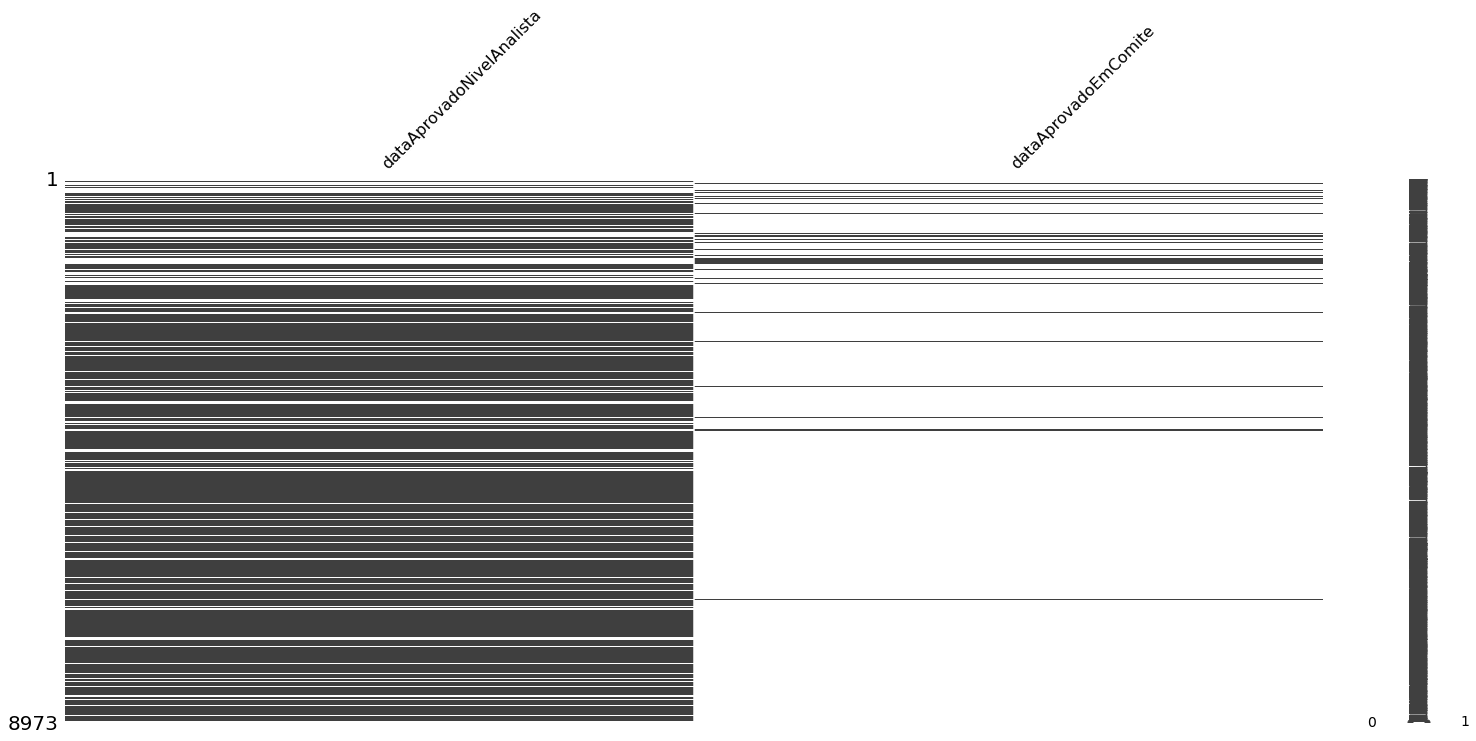

In [95]:
#dfo.("dataAprovadoNivelAnalista","dataAprovadoEmComite")

%matplotlib inline
msno.matrix(dfo[["dataAprovadoNivelAnalista","dataAprovadoEmComite"]])

In [96]:
#para resolver os missing da data da aprovação do analista, vamos considerar a aprovação do comitê e considerar uma unica coluna como pedido aprovado independente por quem tenha sido.
dfo["dataAprovadoNivelAnalista"]=np.where(dfo["dataAprovadoNivelAnalista"].isnull(), dfo["dataAprovadoEmComite"],dfo["dataAprovadoNivelAnalista"])

* *percentual de protesto*

In [97]:
dfo.percentualProtestos.isnull().sum()

1498

In [98]:
dfo["percentualProtestos"].describe()

count    7475.000000
mean        0.019260
std         0.593579
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        36.983728
Name: percentualProtestos, dtype: float64

In [99]:
dfo.scorePontualidade.describe()

count    8973.000000
mean        0.798346
std         0.379186
min         0.000000
25%         0.887479
50%         1.000000
75%         1.000000
max         1.000000
Name: scorePontualidade, dtype: float64

In [100]:
dfo[(dfo["percentualProtestos"].isnull()) & (dfo["scorePontualidade"]==0) ].count()

numero_solicitacao             1498
razaoSocial                    1498
nomeFantasia                   1498
cnpjSemTraco                   1498
maiorAtraso                    1498
margemBrutaAcumulada           1498
percentualProtestos               0
primeiraCompra                 1431
prazoMedioRecebimentoVendas    1498
titulosEmAberto                1498
valorSolicitado                1498
status                         1498
definicaoRisco                 1498
diferencaPercentualRisco       1498
percentualRisco                1498
dashboardCorrelacao            1498
valorAprovado                  1209
dataAprovadoEmComite            137
periodoBalanco                  787
ativoCirculante                 787
passivoCirculante               787
totalAtivo                      787
totalPatrimonioLiquido          787
endividamento                   787
duplicatasAReceber              787
estoque                         787
faturamentoBruto               1345
margemBruta                 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


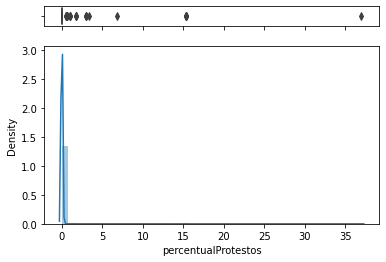

In [101]:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2,
                                    sharex=True,
                                    gridspec_kw={"height_ratios": (.1, .9)})

# Add a graph in each part
sbs.boxplot(dfo['percentualProtestos'], ax=ax_box)
sbs.distplot(dfo['percentualProtestos'], ax=ax_hist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
display()

In [102]:
dfo["percentualProtestos"]=np.where((dfo["percentualProtestos"].isnull()) & (dfo["scorePontualidade"]==0) ,0,dfo["percentualProtestos"])

In [103]:
dfo["percentualProtestos"].describe()

count    8973.000000
mean        0.016045
std         0.541812
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        36.983728
Name: percentualProtestos, dtype: float64


* colocando o percentual protesto em valor absoluto pois eh uma variavel importante e esta expressa em percentual

In [104]:
dfo["percentualProtestoAbsoluto"] = dfo["percentualProtestos"]*100

* *endividamento, estoque, faturamento bruto,margem bruta, custo, capital social e empresa MEI*

In [105]:
#pega a lista dos clientes apenas
client=dfo.cnpjSemTraco.unique()
client[5]

'KAYS53232027306925'

In [106]:
#ordena o dataframe por numero de solicitação
dfo = dfo.sort_values(by="numero_solicitacao")

In [116]:
#Faremos uma tentativa de preenchimeno dos missings para alguns campos.
df=[]
#loop por cada cliente
for k in client:
  #joga no auxiliar os pedidos por cliente
  auxx = dfo[dfo["cnpjSemTraco"] == k].sort_values(by="numero_solicitacao", ascending=True)
  auxx['endividamento'].fillna((auxx['endividamento'].mean()), inplace=True)
  auxx['estoque'].fillna((auxx['estoque'].mean()), inplace=True)
  auxx['faturamentoBruto'].fillna((auxx['faturamentoBruto'].mean()), inplace=True)
  auxx['margemBrutaAcumulada'].fillna((auxx['margemBrutaAcumulada'].mean()), inplace=True)
  auxx['custos'].fillna((auxx['custos'].mean()), inplace=True)
  auxx['totalPatrimonioLiquido'].fillna((auxx['totalPatrimonioLiquido'].mean()), inplace=True)
  auxx['capitalSocial'].fillna((auxx['capitalSocial'].mean()), inplace=True)
  #auxx['empresa_MeEppMei'].fillna((auxx['empresa_MeEppMei'].value_counts().index[0]), inplace=True)
  auxx['empresa_MeEppMei']=auxx['empresa_MeEppMei'].fillna(auxx.mode().iloc[0])
  df.append(auxx)
  #print(k)

df = pd.concat(df)

In [108]:
#Pegando um caso pontualmente para analisar, vemos boa parte dos missings desses campos nao temos como preencher pois nao há aquele dado para o cliente em questão.
df[(df.cnpjSemTraco=="KAYS53232027306925")]

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,definicaoRisco,diferencaPercentualRisco,percentualRisco,dashboardCorrelacao,valorAprovado,dataAprovadoEmComite,periodoBalanco,ativoCirculante,passivoCirculante,totalAtivo,totalPatrimonioLiquido,endividamento,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista,valorAprovadoTratado,percentualProtestoAbsoluto
5,6,Liam Jackson,Gerard Gordon,KAYS53232027306925,0,0.0,0.0,2019-06-28T10:25:57,0,0.0,25000.0,AprovadoAnalista,De 31 a 50 % - Médio,0.622642,0.377358,0.0,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,918476.0,0.0,12.0,0.0,2011.0,De 6 a 10 anos,15000.0,False,True,0.0,38400.0,2020-02-04T15:10:46,20000.0,0.0
1092,1125,Liam Jackson,Gerard Gordon,KAYS53232027306925,0,0.0,0.0,2019-06-28T10:25:57,0,0.0,30000.0,AprovadoAnalista,De 31 a 50 % - Médio,0.622642,0.377358,0.0,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,918476.0,0.0,12.0,0.0,2011.0,De 6 a 10 anos,15000.0,False,True,0.0,38400.0,2020-03-11T19:32:05,20000.0,0.0
1096,1129,Liam Jackson,Gerard Gordon,KAYS53232027306925,0,0.0,0.0,2019-06-28T10:25:57,0,0.0,25000.0,AprovadoAnalista,De 31 a 50 % - Médio,0.622642,0.377358,0.0,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,918476.0,0.0,12.0,0.0,2011.0,De 6 a 10 anos,15000.0,False,True,0.0,38400.0,2020-03-11T19:47:31,20000.0,0.0
1113,1146,Liam Jackson,Gerard Gordon,KAYS53232027306925,0,0.0,0.0,2019-06-28T10:25:57,0,0.0,25000.0,AprovadoAnalista,De 31 a 50 % - Médio,0.622642,0.377358,0.0,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,918476.0,0.0,12.0,0.0,2011.0,De 6 a 10 anos,15000.0,False,True,0.0,38400.0,2020-03-12T17:13:35,25000.0,0.0
2661,2734,Liam Jackson,Gerard Gordon,KAYS53232027306925,0,0.0,0.0,2019-06-28T10:25:57,0,0.0,20000.0,AprovadoAnalista,De 11 a 30 % - Baixo,0.750000,0.250000,0.0,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,972644.0,0.0,12.0,0.0,2011.0,De 6 a 10 anos,15000.0,False,False,0.0,47360.0,2020-06-18T15:39:16,20000.0,0.0
4201,4274,Liam Jackson,Gerard Gordon,KAYS53232027306925,0,0.0,0.0,2019-06-28T10:25:57,0,0.0,22000.0,AprovadoAnalista,De 11 a 30 % - Baixo,0.750000,0.250000,0.0,22000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,972644.0,0.0,12.0,0.0,2011.0,De 6 a 10 anos,15000.0,False,False,0.0,47360.0,2020-08-20T18:18:50,22000.0,0.0
7650,7723,Liam Jackson,Gerard Gordon,KAYS53232027306925,0,0.0,0.0,2019-06-28T10:25:57,0,0.0,22000.0,AprovadoAnalista,De 11 a 30 % - Baixo,0.696429,0.303571,0.0,22000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,918481.0,0.0,12.0,0.0,2011.0,De 6 a 10 anos,15000.0,False,False,0.0,36000.0,2021-01-07T13:03:53,22000.0,0.0


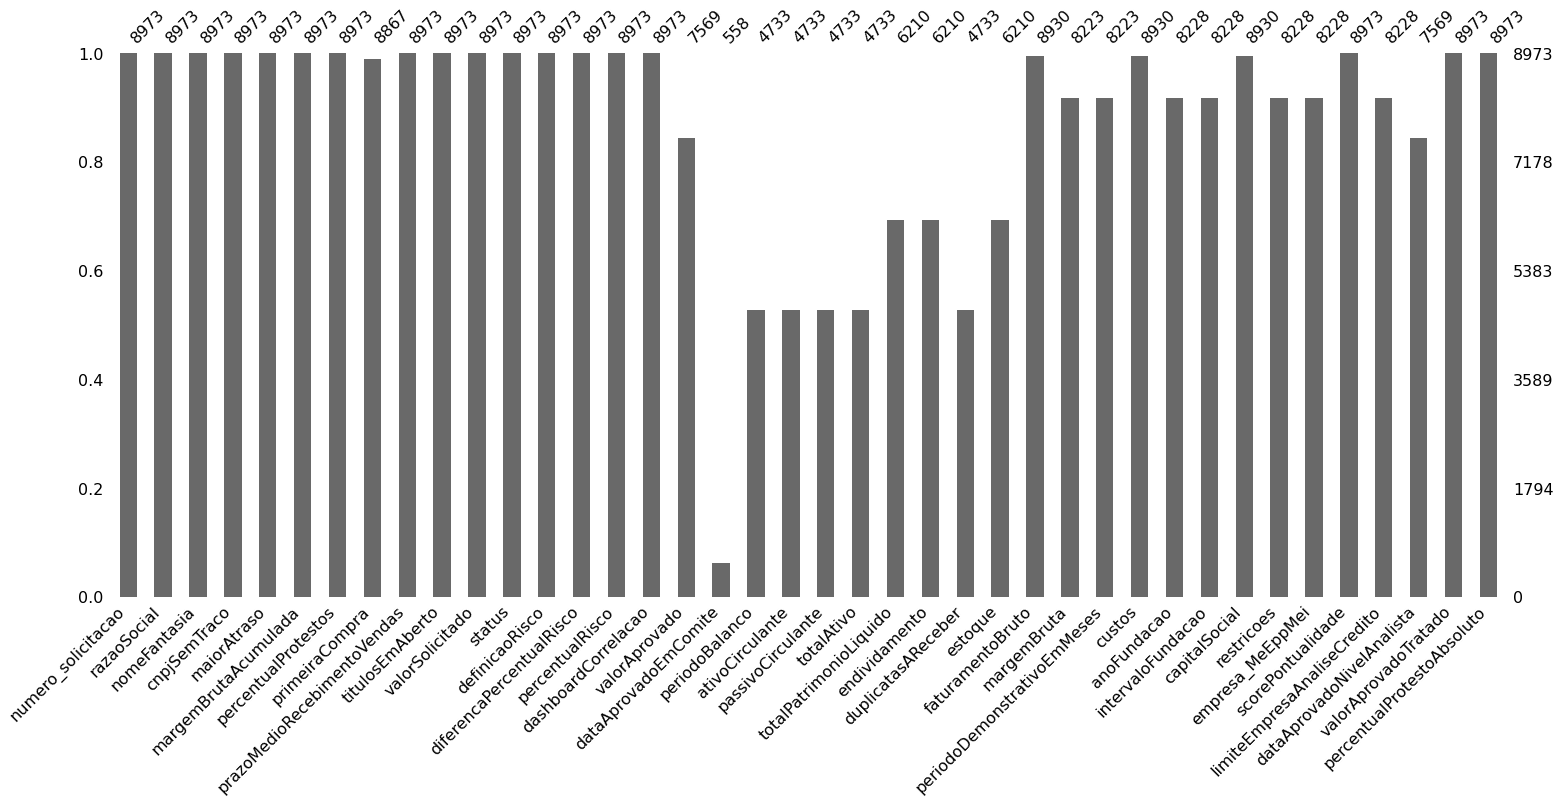

In [117]:
%matplotlib inline
msno.bar(df)

**Conclusão**<br>
*Mesmo fazendo uma tentativa de completar os missing vemos que temos muitos campos que, para aquele cliente, nao temos a informação e assim nao conseguimos enriquecer com o proprio dado do cliente.*

* criando o novo DF com as colunas que vamos trabalhar na clusterização

In [118]:
dfx = df[["cnpjSemTraco","numero_solicitacao","titulosEmAberto","capitalSocial","limiteEmpresaAnaliseCredito","estoque","custos","faturamentoBruto","endividamento","totalPatrimonioLiquido","scorePontualidade","margemBrutaAcumulada","prazoMedioRecebimentoVendas","percentualProtestos"]].copy()

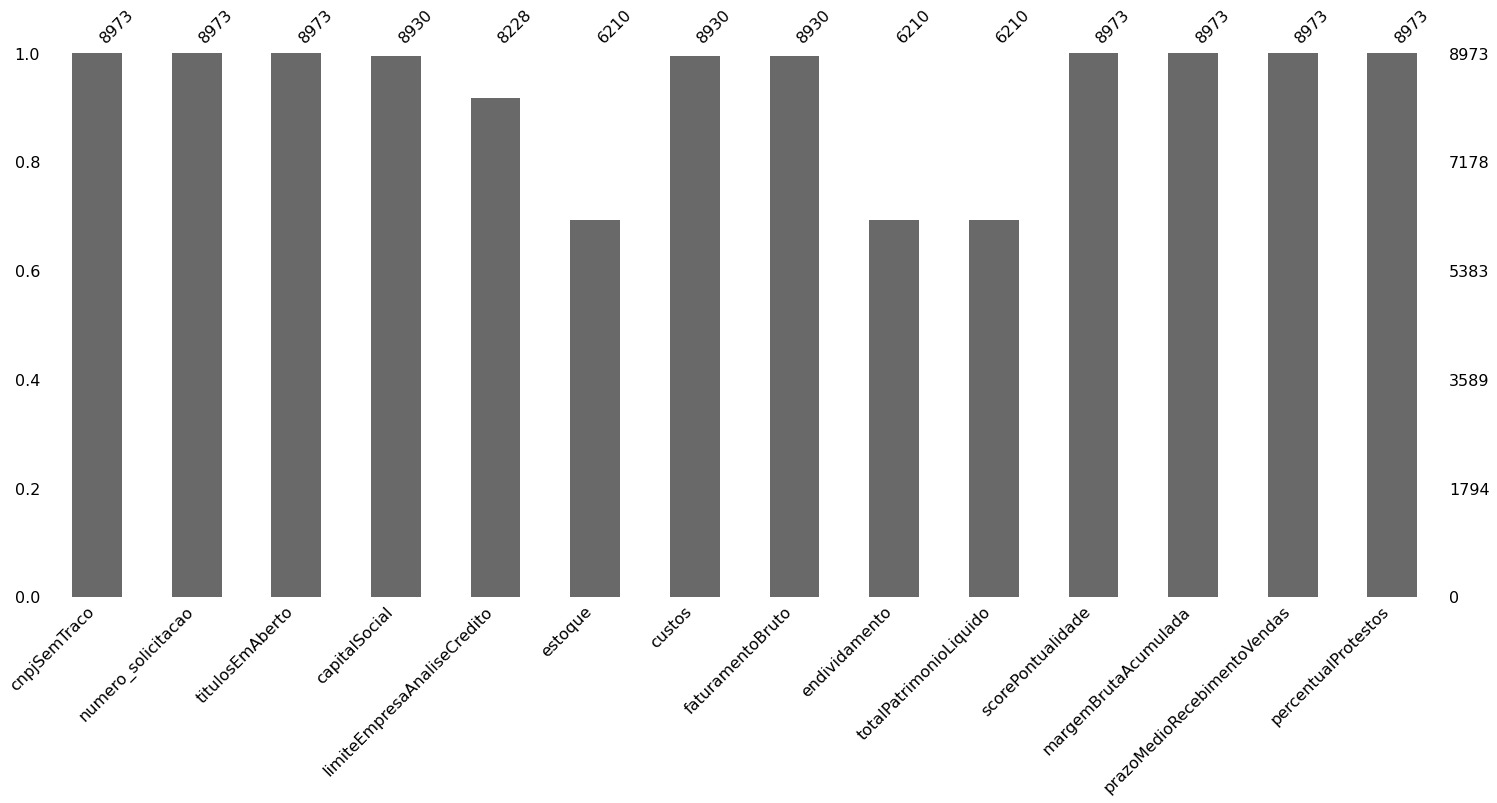

In [119]:
%matplotlib inline
msno.bar(dfx)

AxesSubplot(0.125,0.3515;0.775x0.5285) 



Text(0.5, 1.0, 'Correlation matrix')

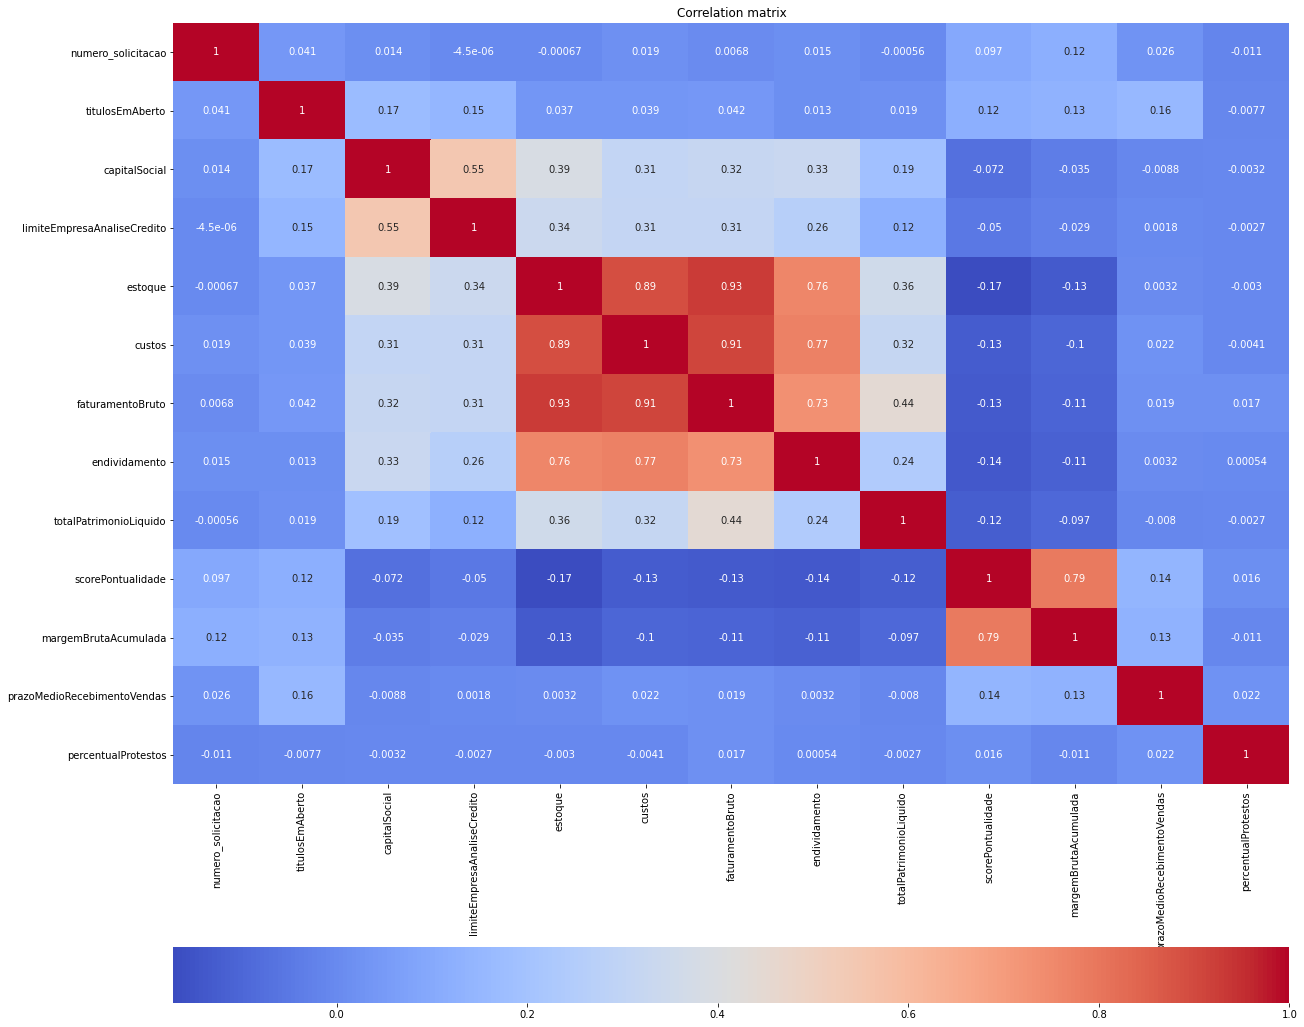

In [120]:
plt.figure(figsize=(20,20)) 
print(sbs.heatmap(dfx.corr(), annot=True, cmap="coolwarm",cbar_kws= {'orientation': 'horizontal'}),"\n")
plt.title('Correlation matrix')